## 6.4 Machine Learning Part 1

### This script contains the following:

#### 01. Import Libraries
#### 02. Import Data
#### 03. Data cleaning
#### 04. Data prep for regression analysis
#### 05. Hypothesis
#### 06. Regression analysis

# 01. Importing Libraries

In [78]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 02. Importing Data

In [80]:
# Define path
path = r'C:\Users\tom\OneDrive\Documents\CareerFoundry - Data Analytics Course\Data Immersion\Tasks\Achievement 6\European Football Analysis'

In [81]:
# Import dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2021-2022 Big 5 European Football Leagues CLEAN.csv'))

# 03. Data Cleaning

In [82]:
# Check Columns
df.columns

Index(['Player', 'Nation', 'Position', 'Team', 'Competition', 'Age', 'Born',
       'Matches Played', 'Starts', 'Minutes Played', '90s Played', 'Goals',
       'Assists', 'Non-Penalty Goals', 'Penalty Goals', 'Penalty Attempts',
       'Yellow Cards', 'Red Cards', 'Shots', 'Shots on Target', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Shot Distance', 'Goals90',
       'Assists90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG90', 'xA90', 'xG+xA90', 'npxG90', 'npxG+xA90'],
      dtype='object')

In [83]:
# Check Head
df.head(20)

,Player,Nation,Position,Team,Competition,Age,Born,Matches Played,Starts,Minutes Played,...,G+A-PK90,xG,npxG,xA,npxG+xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90
0,Aaron Connolly,Ireland,Forward,Brighton,Premier League,21,2000,4,1,156,...,0.00,0.5,0.5,0.4,0.8,0.26,0.20,0.47,0.26,0.47
1,Aaron Cresswell,England,Defender,West Ham,Premier League,31,1989,31,31,2726,...,0.17,1.1,1.1,3.2,4.3,0.04,0.11,0.14,0.04,0.14
2,Aarón Escandell,Spain,Goalkeeper,Granada,La Liga,25,1995,4,3,284,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Aaron Hickey,Scotland,Defender,Bologna,Serie A,19,2002,36,34,2820,...,0.19,1.1,1.1,1.4,2.5,0.04,0.04,0.08,0.04,0.08
4,Aaron Lennon,England,Midfielder,Burnley,Premier League,34,1987,28,17,1551,...,0.12,1.1,1.1,0.5,1.6,0.06,0.03,0.09,0.06,0.09
5,Aarón Martín,Spain,Defender,Mainz 05,Bundesliga,24,1997,28,25,2292,...,0.08,1.0,1.0,4.1,5.1,0.04,0.16,0.20,0.04,0.20
6,Aaron Ramsdale,England,Goalkeeper,Arsenal,Premier League,23,1998,34,34,3060,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
7,Aaron Ramsey,Wales,Midfielder,Juventus,Serie A,30,1990,3,1,99,...,0.00,0.0,0.0,0.1,0.1,0.00,0.10,0.10,0.00,0.10
8,Aaron Wan-Bissaka,England,Defender,Manchester Utd,Premier League,23,1997,20,20,1793,...,0.00,0.2,0.2,0.9,1.1,0.01,0.05,0.06,0.01,0.06
9,Abdel Jalil Medioub,Algeria,Defender,Bordeaux,Ligue 1,23,1997,10,6,622,...,0.00,0.1,0.1,0.0,0.1,0.01,0.00,0.01,0.01,0.01


In [84]:
# Check Shape
df.shape

(2921, 40)

##### Missing values

In [85]:
# Check for missing values
df.isnull().sum()

# No missing values to handle

Player               0
Nation               0
Position             0
Team                 0
Competition          0
Age                  0
Born                 0
Matches Played       0
Starts               0
Minutes Played       0
90s Played           0
Goals                0
Assists              0
Non-Penalty Goals    0
Penalty Goals        0
Penalty Attempts     0
Yellow Cards         0
Red Cards            0
Shots                0
Shots on Target      0
SoT%                 0
Sh/90                0
SoT/90               0
G/Sh                 0
G/SoT                0
Shot Distance        0
Goals90              0
Assists90            0
G+A90                0
G-PK90               0
G+A-PK90             0
xG                   0
npxG                 0
xA                   0
npxG+xA              0
xG90                 0
xA90                 0
xG+xA90              0
npxG90               0
npxG+xA90            0
dtype: int64

##### Duplicates check

In [86]:
dups = df.duplicated()

In [87]:
dups.shape # No dups

(2921,)

##### Extreme values checks

<AxesSubplot:xlabel='Goals', ylabel='Count'>

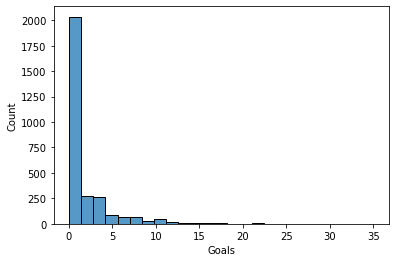

In [88]:
# Check for extreme values
sns.histplot(df['Goals'], bins=25)

In [89]:
# Check the mean
df['Goals'].mean()

1.702156795617939

In [90]:
# Check the median
df['Goals'].median()

0.0

In [91]:
# Check the max
df['Goals'].max() # Check the max

35

# 04. Data prep for regression analysis 

I am going to look at minutes played vs xG. As 'xG' is a statistic on the likelyhood of a goal being scored, defensive players are unlikely to contribute much to this. In an ideal world, I would simply compare forward players xG, to get a real understanding of how minutes played affects it. Unfortunately, this would put me under the required 1500 rows of data. As a comprimise, I will be using a subset that excludes Goalkeeper and Defender data. This still gives me enough data, but will provide a better comparison.

In [97]:
# Drop Goalkeepers
df.drop(df.index[df['Position'] == 'Goalkeeper'], inplace = True)

In [98]:
# Drop Defenders
df.drop(df.index[df['Position'] == 'Defender'], inplace = True)

In [103]:
# Create subset for analysis
subset = df[['Position', 'Minutes Played', 'xG']]

In [104]:
# Check Shape
subset.shape

(1761, 3)

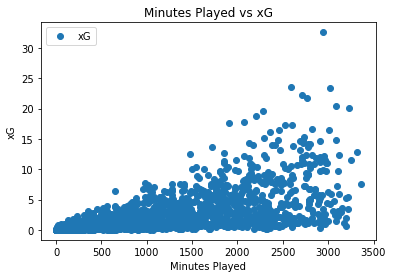

In [126]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
subset.plot(x = 'Minutes Played', y='xG',style='o')
plt.title('Minutes Played vs xG')  
plt.xlabel('Minutes Played')  
plt.ylabel('xG')  
plt.show()

In [127]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = subset['Minutes Played'].values.reshape(-1,1)
y = subset['xG'].values.reshape(-1,1)

In [107]:
X

array([[ 156],
       [1551],
       [  99],
       ...,
       [1553],
       [  18],
       [1016]], dtype=int64)

In [108]:
y

array([[0.5],
       [1.1],
       [0. ],
       ...,
       [0.9],
       [0. ],
       [6.8]])

In [109]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Hypothesis

#### "The more minutes played, the higher a players xG will be".

# 06. Regression analysis

In [110]:
# Create a regression object.
regression = LinearRegression()

In [111]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [112]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

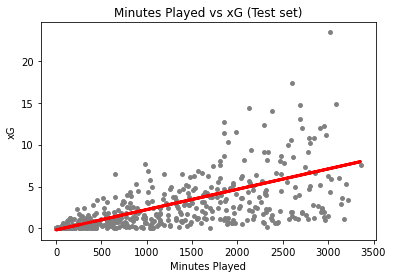

In [116]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Minutes Played vs xG (Test set)')
plot_test.xlabel('Minutes Played')
plot_test.ylabel('xG')
plot_test.show()

Considering there are still some players in this analysis that may not be relevant to the xG stat (As there role in the team is not to score goals, i.e. defensive midfielders), I think the line fit the data reasonably well; as mroe minutes are played, there is a noticeable increase in xG.

In [117]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [118]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00242526]]
Mean squared error:  5.817783102627056
R2 score:  0.37745824915543136


In [119]:
y_predicted

array([[ 9.02861743e-01],
       [ 6.58282946e+00],
       [ 6.41306100e+00],
       [-8.42206059e-02],
       [ 3.10015071e+00],
       [-9.39216609e-02],
       [ 4.59896371e+00],
       [ 4.20364572e+00],
       [ 3.31599918e+00],
       [ 2.29253788e+00],
       [ 1.98937991e+00],
       [ 3.18988547e+00],
       [ 8.98011215e-01],
       [ 1.52152081e-02],
       [ 5.64446920e-02],
       [ 4.92992168e-01],
       [-1.03622716e-01],
       [-3.81405945e-02],
       [ 2.40895054e+00],
       [ 3.20686231e+00],
       [ 4.37826471e+00],
       [ 1.14651022e-01],
       [ 9.24689117e-01],
       [ 6.89326322e+00],
       [ 2.35074421e+00],
       [-8.66458697e-02],
       [ 6.13415567e+00],
       [ 5.37504811e+00],
       [ 4.41949419e+00],
       [ 5.36646916e-01],
       [ 7.58468020e-02],
       [ 4.57228581e+00],
       [-1.61829046e-01],
       [ 3.03821595e-01],
       [ 5.17244806e-01],
       [ 1.63044087e+00],
       [-7.45195509e-02],
       [ 3.98294671e+00],
       [ 1.4

In [120]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.1,0.902862
1,6.7,6.582829
2,2.0,6.413061
3,0.0,-0.084221
4,2.4,3.100151
5,0.0,-0.093922
6,1.8,4.598964
7,1.1,4.203646
8,5.2,3.315999
9,6.8,2.292538


The first issue with the model is that it shows minus values, which would not be possible with the xG variable and so would need amending to stop this from occuring. The mean squared error of 5.8 is also quite high in terms of xG, indicating a regression model may not be the best fit for these two variables. Equally, an R2 score of 0.377 shows that this model is a poor fit for what is required.

##### Compare how the regression fits the training set

In [121]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [122]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [123]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00242526]]
Mean squared error:  7.600698330969
R2 score:  0.3915123111745249


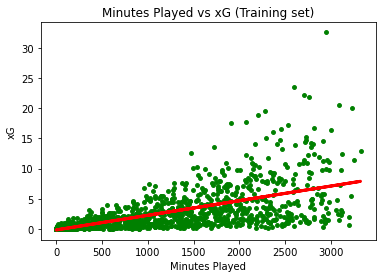

In [125]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Minutes Played vs xG (Training set)')
plot_test.xlabel('Minutes Played')
plot_test.ylabel('xG')
plot_test.show()

Clearly, the model is not upto scratch for what is required, however there is a mitigating factor. There are a number of players included who have played many minutes, but do not have a high xG because there role within their team is not to try and score goals. As such, these players being in the data set skews the results in a negative fashion. A data set tailored specifically to players who score goals (i.e. forwards) would likely produce a more accurate representation of the relationship between these variables. Unfortunately this was not possible due to minimum rows requirement.